# Исследование продаж видеоигр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

## Цели проекта

Главная цель проекта - установление закономерностей, определяющих успешность видеоигры.

## Перечень столбцов

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Извучение данных

In [1]:
#блок загрузки библиотек
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats as st

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

sns.set()

In [3]:
#датасет
data = pd.read_csv(r'C:\Users\User\My Jupyter Projects\UPLOAD\Изучение закономерностей определяющих успешность игр\games.csv')

In [4]:
#5 строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


    
Импортированы все необходимые бибилиотеки. Таблица выгружена и присвоена переменной data. 
Изучив типы данных, согласно таблице выше, можно заключить, что необходимо изменить тип данных в следующих столбцах: 
- "Year_of_Release" на int
- "User_Score" на float

В данных есть пропуски. Проведем их анализ ниже.

### Предобработка данных

- TO DO:


    - Заменить названия столбцов (привести к нижнему регистру);
    - Преобразовать данные в нужные тип \ обработать пропуски при необходимости;
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

#### Замена названий столбцов

In [6]:
#приведение к нижнему регистру названий столбцов
new_col = []
for i in data.columns:
    new_col.append(i.lower())
data.columns = new_col

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразование данных к нужным типам \ обработка пропусков

In [8]:
#количество пропусков
pd.isnull(data).sum().to_frame()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


In [9]:
#доля пропускав
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


##### name

In [10]:
#строки с 2мя пропусками в 'name'
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#удаление 2х строк без названия и жанра
data.drop(data[data.name.isna()].index, inplace=True)

Столбец "name" отвечает за название продукта, "genre" - за жанр. Восстановить пропуски в этих ячейках не представляется возможным, потому как нет данных согласно которым это можно сделать. Наиболее верное решение в этом случае - удаление строк. Вероятно, пропуски возникли по причине некорректного внесения данных.

##### release date

In [12]:
#удаление строк с неизвестной датой релиза
data.drop(data[data.year_of_release.isna()].index, inplace=True)

In [13]:
#приведем тип float к типу int
data.year_of_release = data.year_of_release.astype('int')

##### rating

Далее обратимся к уникальным значениям столбцов:

In [14]:
#уникальные значения рейтинга
display(data.rating.unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)


Согласно Entertainment Software Association, рейтинги имеют следующие буквенные обозначения:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается» (продукт был отправлен в ESRB и ожидает присвоения рейтинга).

Также среди уникальных значений присутствует аббревиатура 'K-A' ("Kids to Adults"). Позже эта категория получила для обозначения литеру "E". Соответственно приведем строки с 'K-A' в ячейках к "E".

In [15]:
#замена обозначения 'K-A' на 'E'
data.loc[data.rating == 'K-A', 'rating'] = 'E'

Значения NaN в столбце 'rating' оставим без изменений. Удаление их нецелесообразно, в связи с количеством. Замена не представляется возможной.

##### critic_score

In [16]:
#уникальные значения для оценок критиков
display(data.critic_score.unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Восстановить оценки критиков, там где они отсутствуют не представляется возможным. Вероятно, производители тех игр, в ячейках "critic_score" которых - "NaN", не сотрудничают с Entertainment Software Association.

##### user_score

In [17]:
#уникальные значения для оценок пользователей
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В перечне уникальных значений, присутствует значение 'tbd' (to be determined), т.е. рейтинг ожидается. Для приведения столбца, необходимо исключить строковые значения, поэтому изменим содержание таких ячеек на NaN.

In [18]:
#используем функцию для замены 'tbd' на NaN
def change_tbd(w_value, cor_value):
    data.user_score = data.user_score.replace(w_value, cor_value)
change_tbd('tbd', np.NaN)

In [19]:
#чек
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Значения NaN остаются без изменений. Удаление нецелесообразно, по причине количества. Причиной же отсутствия рейтинга может быть то, что игры со значениями NaN не оценивались.

In [20]:
#приведем тип user_score к float
data.user_score = data.user_score.astype('float')

In [21]:
#чек
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


#### Подсчет суммарных продаж во всех регионах

In [22]:
#созние нового столбца с суммарным количеством продаж
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [23]:
#чек
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


#### Проверка явных дубликатов

In [24]:
#дубликаты
data.duplicated().sum()

0


На стадии предобработки необходимо подготовить данные к дальнейшему анализу. Были удалены пропуски в столбцах "name" и "release date". Общее количество удаленных строк 271 из 16715. В столбце user_score произведена замена значений tbd на nan, для того чтобы привести столбец к типу float. Также к типу int был приведен столбец с датой релиза. Явные дубликаты в данных отсутствуют.


### Исследовательский анализ данных

- TO DO:


    - Посмотреть, сколько игр выпускалось в разные годы;
    - Обзор платформ с наибольшими суммарными продажами;
    - Взять данные за соответствующий актуальный период /выбрать несколько потенциально прибыльных платформ;
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
    - Посмотреть на общее распределение игр по жанрам.

#### Количество выпускаемых игр

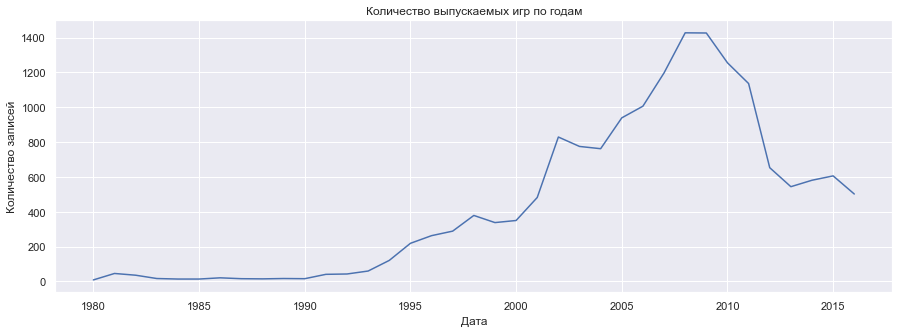

In [25]:
#количество выпускаемых игр по годам
ax = data.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(15,5))
ax.set_title('Количество выпускаемых игр по годам')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество записей')
plt.show()

В 90е годы объемы продаж игр показывали большие темпы роста, вплоть до 2008 года. Начиная с 2008 года началось существенное падение объема продаж. Вероятно, это может быть связано с тем фактом, что в 2008 году появился App Store. Рынок мобильных игр начал стремительно развиваться, переключив тем самым внимание аудитории. В 2013 падение замедлилось, 2 гиганта индустрии объявили о выходе 2х новых консолей - PS4 и Xbox One. 

#### Обзор платформ с наибольшими суммарными продажами

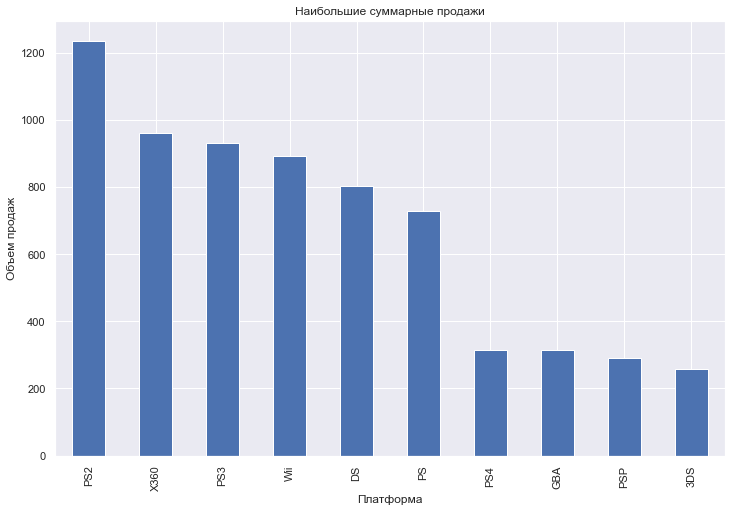

In [26]:
#объем продаж за всё время (топ 10 платформ)
ax = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10).plot(y='last_price', kind='bar', grid=True)
ax.set_title('Наибольшие суммарные продажи')
ax.set_xlabel('Платформа')
ax.set_ylabel('Объем продаж')
plt.show()

Основываясь на распределении показателей, наибольшее число продаж демонстрируют Sony и Microsoft c их продуктами Play Station 2,3 и Xbox 360.

In [27]:
#среднее время жизни по всем платформам
data.groupby('platform').year_of_release.nunique().sort_values(ascending=False).mean()

7.67741935483871

Среднее время жизни платформ - 7,6 лет. Лидеры рынка Sony - анонсируют и выпускают новые консоли раз в 6-7 лет начиная от PS2, заканчивая PS-4.

#### Актуальный период

Актуальным периодом можно считать такой период, который позволит построить прогноз на 2017 год. Наиболее важное событие в определении этого периода - появляение 2х новых консолей - PS4 и Xbox One. Рассмотрим на диаграмме данные начиная с 2014 года, потому как релиз консолей пришелся на ноябрь 2013го.

In [28]:
#срез данных 2014 - 2016 гг.
data_temp = data.query('2014 <= year_of_release <= 2016')

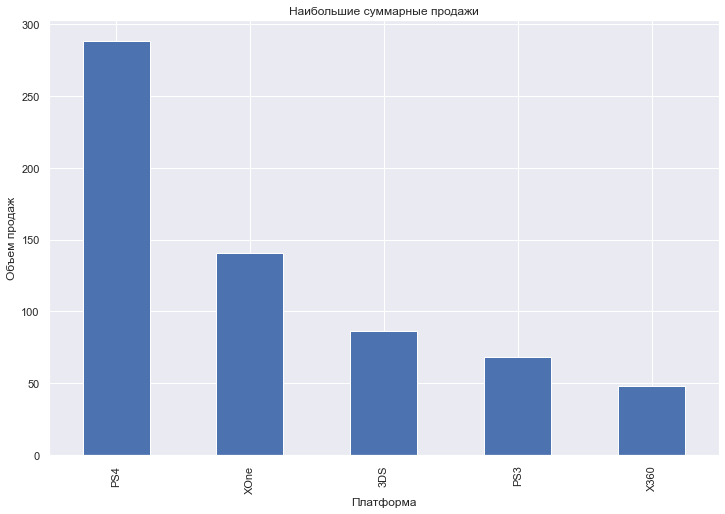

In [29]:
ax = data_temp.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head().plot(y='last_price', kind='bar', grid=True)
ax.set_title('Наибольшие суммарные продажи')
ax.set_xlabel('Платформа')
ax.set_ylabel('Объем продаж')
plt.show()

Столбчатая диаграмма показыват, что за актуальный период лидерство в объемах у PS4, следом Xbox One и замыкает тройку - консоль от Nintendo -  3DS.

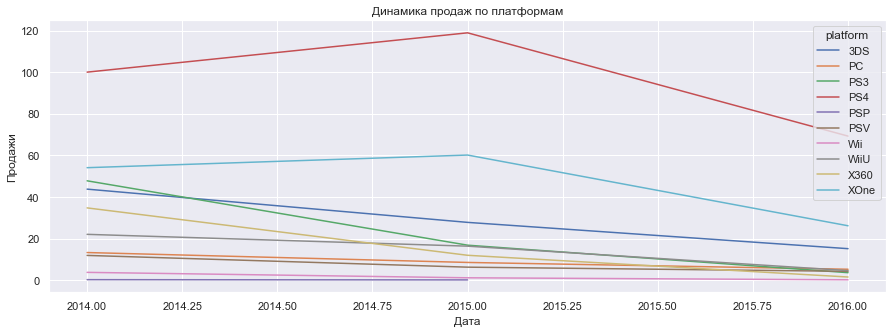

In [30]:
#визуальное отображение 15-16 года
ax = data_temp.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum') \
    .plot(grid=True, figsize=(15,5))     
ax.set_title('Динамика продаж по платформам')
ax.set_xlabel('Дата')
ax.set_ylabel('Продажи')
plt.show()

до 2015 года PS4 и Xbox One демонстрировали рост объемов продаж, остальные консоли, включая Nintendo - 3DS - устойчивое снижение показателей.
    
После 2015 - лидеры рынка также показали спад.

In [31]:
#платформы с наибольшими суммарными продажами за 2015-16 г.
data.query('2015 <= year_of_release <= 2016').groupby('platform')['sum_sales'] \
    .sum().sort_values(ascending=False) \
    .head().to_frame()

,sum_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42


Выделяем 3х потенциальных лидеров продаж:

- PS4	
- XOne	
- 3DS

#### Ящик с усами по глобальным продажам для лидеров продаж

In [32]:
#срез платформ и лет
temp = data.query('platform == ["PS4", "XOne", "3DS"] and year_of_release > 2014')

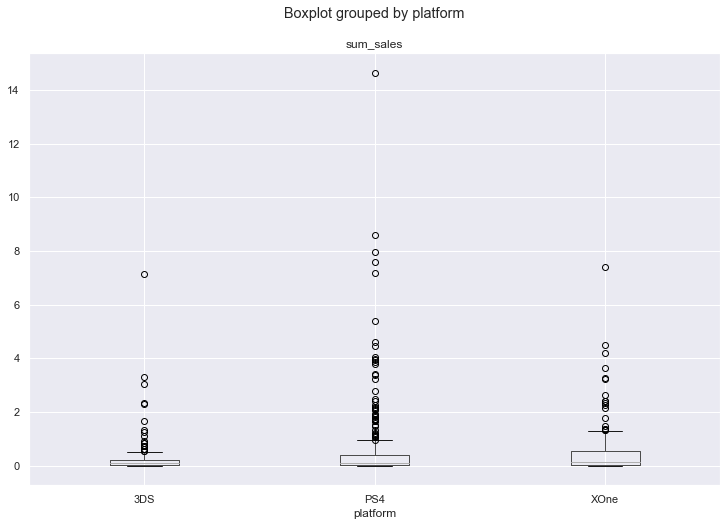

In [33]:
temp.boxplot(column='sum_sales', by='platform');

In [34]:
temp.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.09,0.2325,7.14
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.4200,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.5550,7.39


На диаграммах присутствуют выбросы, что вполне допустимо, т.к. ряд игр могут иметь огромные показатели продаж. На платформе PS4, вышло больше игр, значительно превышающих средние показатели, чем на двух других.

#### Влияние отзывов на продажи

Ранее выявлено, что наиболее популярной платформой за рассматриваемый актуальный период - является Play Station 4 от Sony. Рассмотрим влияние отзывов пользователей и критиков на показатели.

In [35]:
#объявим переменную, куда положим все данные по PS 4 за актуальный период
data_ps4 = temp[temp.platform == 'PS4']

пользователи

In [36]:
#коэффициен корреляции оценок пользователей к общим продажам
data_ps4.user_score.corr(data_ps4.sum_sales)

-0.0597384571263821

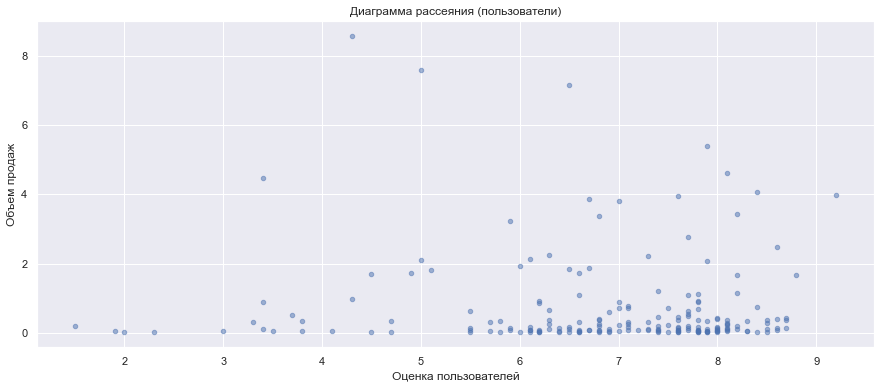

In [37]:
#диаграмма рассеяния
ax = data_ps4.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.5, figsize=(15,6), grid=True) 
ax.set_title('Диаграмма рассеяния (пользователи)')
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Объем продаж')
plt.show()

критики

In [38]:
#коэффициен корреляции оценок критиков к общим продажам
data_ps4.critic_score.corr(data_ps4.sum_sales)

0.39284855551305986

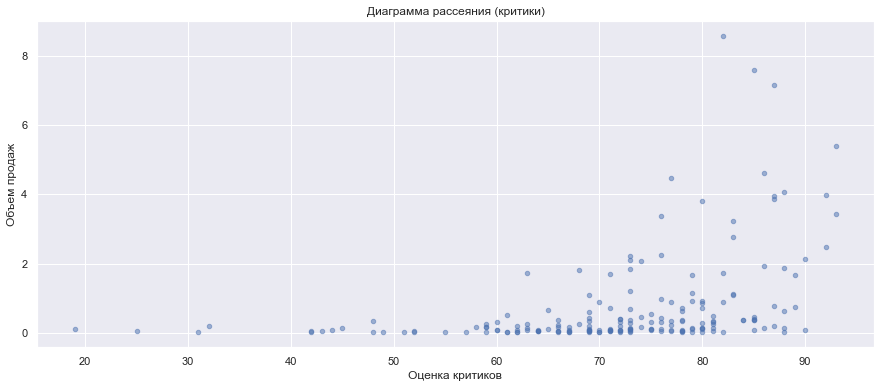

In [39]:
#диаграмма рассеяния
ax = data_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.5, figsize=(15,6), grid=True)
ax.set_title('Диаграмма рассеяния (критики)')
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Объем продаж')
plt.show()

##### Промежуточный вывод

В исследовании зависимости оценок пользователей к сумме продаж - слабо отрицательная корреляция. В зависимости оценок критиков - умеренно положительная положительная. Следовательно, покупатели охотнее прислушиваются к критикам, чем к покупателям.    

#### Соотношение выводов с другими платформами

Xbox ONE

In [40]:
#объявим переменную, куда положим все данные по Xbox One за актуальный период
data_xbox = temp[temp.platform == 'XOne']

In [41]:
#коэффициен корреляции оценок пользователей к общим продажам
data_xbox.user_score.corr(data_xbox.sum_sales)

-0.04146733387366271

In [42]:
#коэффициен корреляции оценок критиков к общим продажам
data_xbox.critic_score.corr(data_xbox.sum_sales)

0.43088874582136805

Nintendo 3DS

In [43]:
# объявим переменную, куда положим все данные по Nintendo 3DS за актуальный период
data_nint = temp[temp.platform == '3DS']

In [44]:
#коэффициен корреляции оценок пользователей к общим продажам
data_nint.user_score.corr(data_nint.sum_sales)

0.19879627008102982

In [45]:
#коэффициен корреляции оценок критиков к общим продажам
data_nint.critic_score.corr(data_nint.sum_sales)

0.17757455046092874

Выполнено исследование для платформ, входящих в ТОП 3 актуального периода. Для Xbox - также верно утверждение, что покупатели охотнее прислушиваются к мнению критиков, нежели к оценкам покупателей. В случае с Nintendo 3DS значения примерно равны: связь оценок пользователей и критиков имеет довольно слабую корреляцию к общим продажам.

Оценим коэффициент корреляции по 4м наиболее популярным платформам за всё время: PS2, X360, PS3, Wii

In [46]:
#список наиболее популярных платформ 
top_all_the_time = ['PS2','X360','PS3','Wii']

In [47]:
#функция возвращающая расчет корреляции
def other_platform_matrix(name_of_platform):
    platform = data[data['platform']==name_of_platform]   
    correl = platform['user_score'].corr(platform['sum_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_sales'])
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

    

In [48]:
#цикл, запускающий расчет по ТОП4
for platform in top_all_the_time:
    other_platform_matrix(platform)

Корреляция между отзывами критиков и игровой платформой  PS2 : Умеренная 0.3925364754450901
Корреляция между отзывами пользователей и продажами  PS2 : Слабая 0.1750550277038374


Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.3928658925400702
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.11418661214018043


Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.4327589578997139
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12841562938563025


Корреляция между отзывами критиков и игровой платформой  WII : Слабая 0.17790728577594922
Корреляция между отзывами пользователей и продажами  WII : Слабая 0.11283121360773787




##### Промежуточный вывод

 Тенденция сохранилась. Пользовательские оценки не влияют на объем продаж, напротив оценки критиков имеют умеренную корреляцию с объемами продаж.

#### Общее распределение игр по жанрам

за весь период

In [49]:
#объявление переменнок, где будет лежать сводная таблица по жанрам
genres_test = data.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
#индексы
genres_test = genres_test.reset_index().rename_axis(None, axis=1)
genres_test

,genre,sum_sales
0,Platform,0.27
1,Shooter,0.24
2,Sports,0.22
3,Fighting,0.21
4,Action,0.19
5,Racing,0.19
6,Role-Playing,0.18
7,Misc,0.16
8,Simulation,0.15
9,Puzzle,0.10


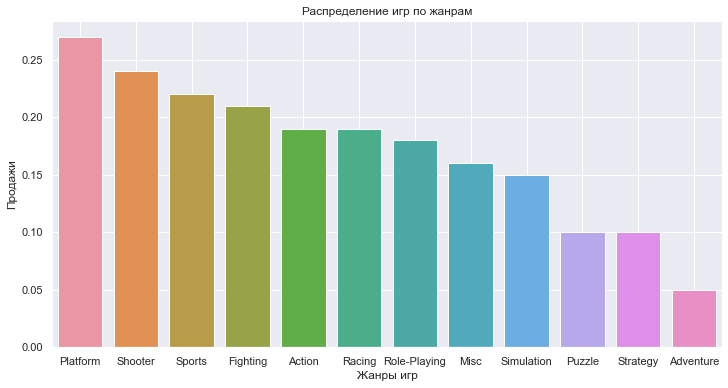

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=genres_test, x="genre", y="sum_sales")
sns.set()
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.grid(True)
plt.show()

за актуальный период

In [51]:
#объявление переменнок, где будет лежать сводная таблица по жанрам
genres_test2 = data_temp.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
#индексы
genres_test2 = genres_test2.reset_index().rename_axis(None, axis=1)
genres_test2

,genre,sum_sales
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


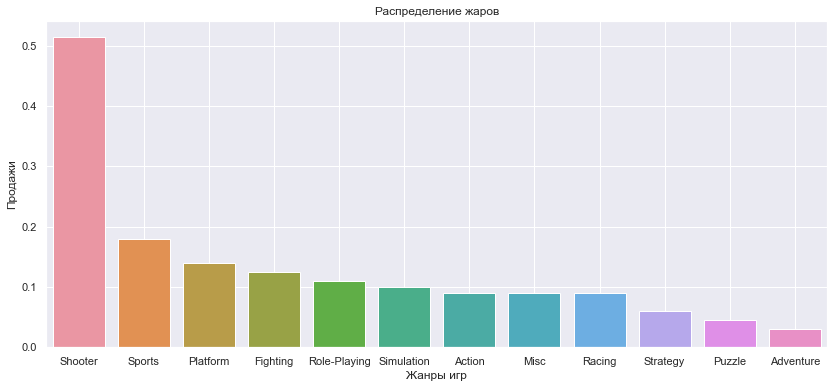

In [52]:
plt.figure(figsize=(14,6))
sns.barplot(data=genres_test2, x="genre", y="sum_sales")
plt.title('Распределение жаров')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.grid(True)
plt.show()

#### Вывод по исследовательскому анализу данных

Вплоть до 2008 года, индустрия показывала большой рост объемов продаж, но начиная с 2008 года, всвязи с появлением и  последующим развитием рынка мобильной разработки, объемы продаж игр начали снижаться.
    
В 2013 2 гиганта индустрии объявили о выходе 2х новых консолей - PS4 и Xbox One, которые за 2015-16 годы показали наибольший объем продаж.
    
    
До 2013 продукты Sony и Microsoft также занимали лидирующие позиции. Nintendo - 3DS ненадолго захватила инициативу, но после 2008 года, объемы продаж игр для этой консоли пошли на спад.

    
Среднее время жизни платформ - 7,6 лет. Лидеры рынка Sony - анонсируют и выпускают новые консоли раз в 6-7 лет.

    
Наблюдается взаимосвязь между пользовательскими оценками, оценками критиков и суммарными продажами. Пользовательские оценки показывают слабый коэффициен корреляции, в то время как оценки критиков - умеренные, из чего можно заключить, что оценки критиков - имеют большее воздействие на конечного покупателя продукта.

    
Исследование распределения прибыльности согласно жанру, показало следующие результаты:

По всему набору данных ТОП5:

- Platform
- Shooter 
- Sports
- Fighting
- Action

По выборке актуального периода:

- Shooter
- Sports
- Platform
- Fighting
- Role-Playing
   

### Портрет пользователя каждого региона

- TO DO: Определить для каждого региона (NA, EU, JP)


    - Самые популярные платформы (топ-5);
    - Самые популярные жанры (топ-5);
    - Влияние рейтинга ESRB на продажи в отдельных регионах;

#### Портрет пользователя NA

In [53]:
#функция для визуализации
def plot_histogram(data, group_by, column, title, xlabel, ylabel):
    ax = data.groupby(group_by)[column].sum().sort_values(ascending=False).head().to_frame() \
                                       .plot(y=column, kind='bar', grid=True, figsize=(15,5)) 
    ax.set_title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

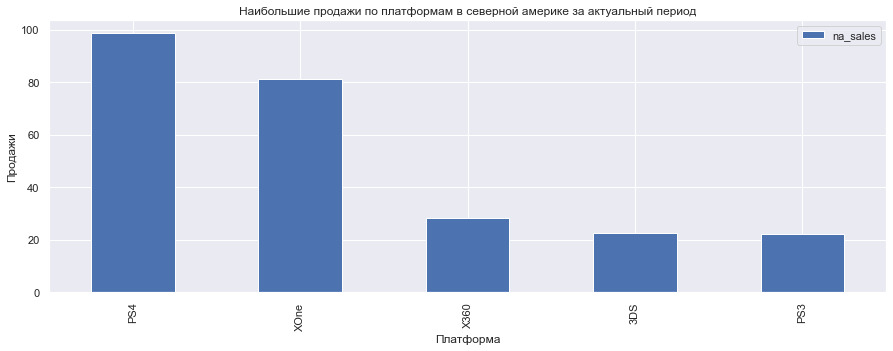

In [54]:
#ТОП 5 платформ за актуальный период
plot_histogram(data_temp, 'platform', 'na_sales', 'Наибольшие продажи по платформам в северной америке за актуальный период',
               'Платформа', 'Продажи')

In [55]:
#доля PS4 к общему числу продаж в северной америке
na = data_temp.query('platform == "PS4"')
na['na_sales'].sum() / data_temp['na_sales'].sum()

0.34714496937266764

In [56]:
#доля XOne к общему числу продаж в северной америке
na = data_temp.query('platform == "XOne"')
na['na_sales'].sum() / data_temp['na_sales'].sum()

0.28610152784622966

 Наиболее популярными платформами за актуальный период в северной америке, 2014-2016 гг, являются платформы PS4 с долей 34.7% от общих продаж, и Xbox One - с 28.6%.

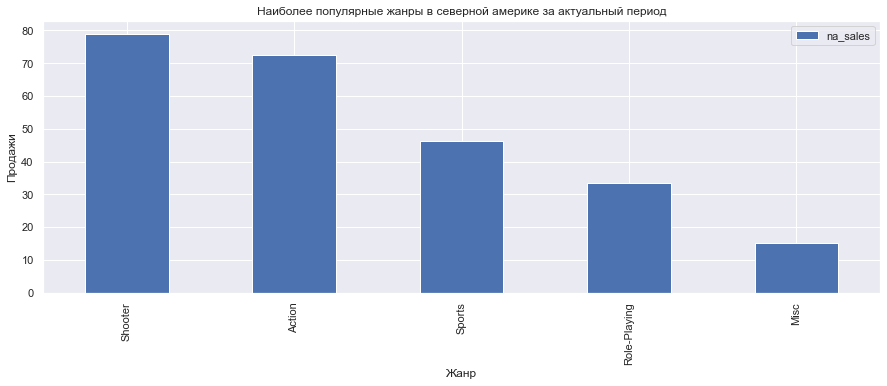

In [57]:
#ТОП 5 жанров за актуальный период
plot_histogram(data_temp, 'genre', 'na_sales', 'Наиболее популярные жанры в северной америке за актуальный период',
               'Жанр', 'Продажи')

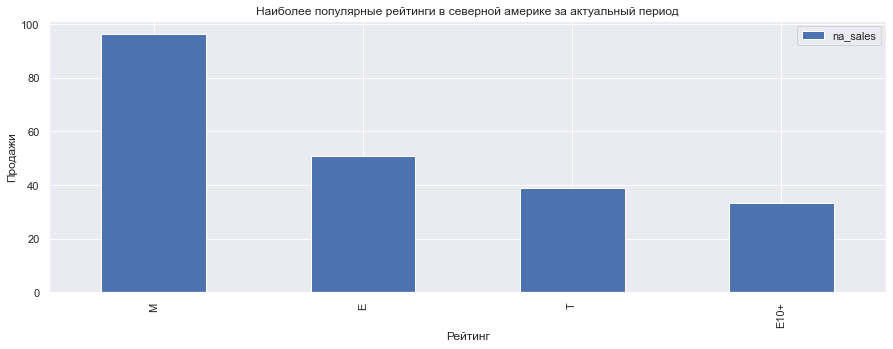

In [58]:
#распределение рейтингов
plot_histogram(data_temp, 'rating', 'na_sales', 'Наиболее популярные рейтинги в северной америке за актуальный период',
               'Рейтинг', 'Продажи')

 - ВЫВОД по актуальному периоду в Северной Америке в актуальный период (2014-16)
     
     
     - ТОП игровых консолей: PS4, XBox One;
     - ТОП жанров игр: Shooter, Action, Sports;
     - ТОП рейтингов: «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам».

#### Портрет пользователя EU

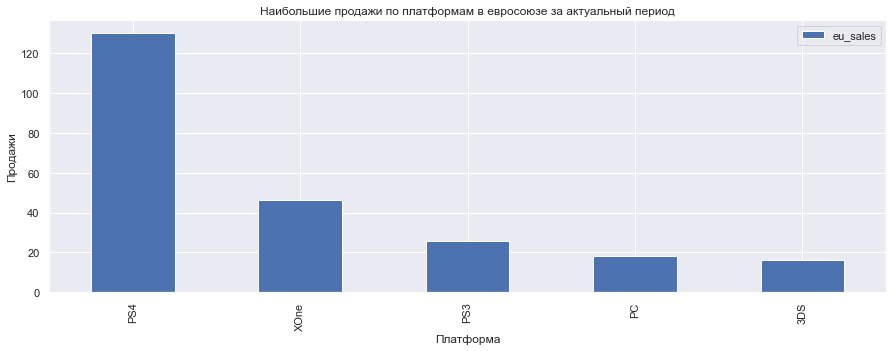

In [59]:
#ТОП 5 платформ за актуальный период
plot_histogram(data_temp, 'platform', 'eu_sales', 'Наибольшие продажи по платформам в евросоюзе за актуальный период',
               'Платформа', 'Продажи')

In [60]:
#доля PS4 к общему числу продаж в евросоюзе
na = data_temp.query('platform == "PS4"')
na['eu_sales'].sum() / data_temp['eu_sales'].sum()

0.4804196837594208

In [61]:
#доля XOne к общему числу продаж в евросоюзе
na = data_temp.query('platform == "XOne"')
na['eu_sales'].sum() / data_temp['eu_sales'].sum()

0.17086596719373434

 Наиболее популярной платформой за актуальный период в евросоюзе, 2014-2016 гг, являются платформа PS4 с долей 48.0% от общих продаж, далее, с большим отрывом Xbox One - с 17.1%.

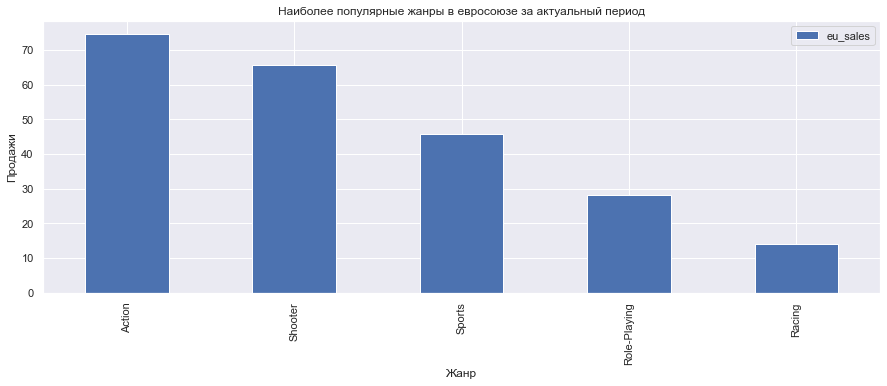

In [62]:
#ТОП 5 жанров за актуальный период
plot_histogram(data_temp, 'genre', 'eu_sales', 'Наиболее популярные жанры в евросоюзе за актуальный период',
               'Жанр', 'Продажи')

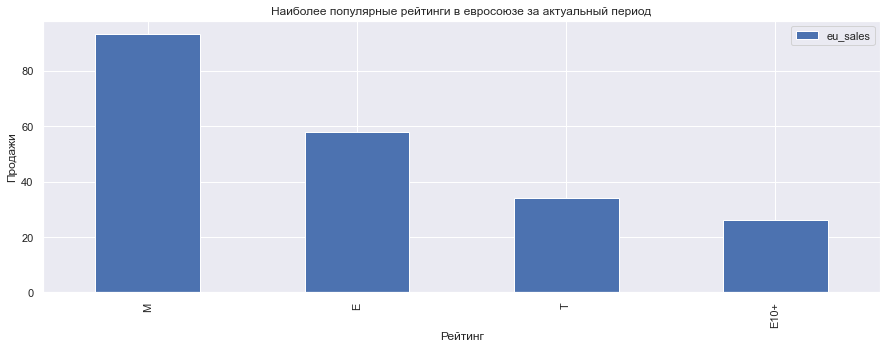

In [63]:
#рейтинг за актуальный период
plot_histogram(data_temp, 'rating', 'eu_sales', 'Наиболее популярные рейтинги в евросоюзе за актуальный период',
               'Рейтинг', 'Продажи')

 - ВЫВОД по актуальному периоду в Евросоюзе в актуальный период (2014-16)
     
     
     - ТОП игровых консолей: PS4 и с большим отрывом - Xbox One;
     - ТОП жанров игр: Action ,Shooter, Sports;
     - ТОП рейтингов: «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам».

#### Портрет пользователя JP

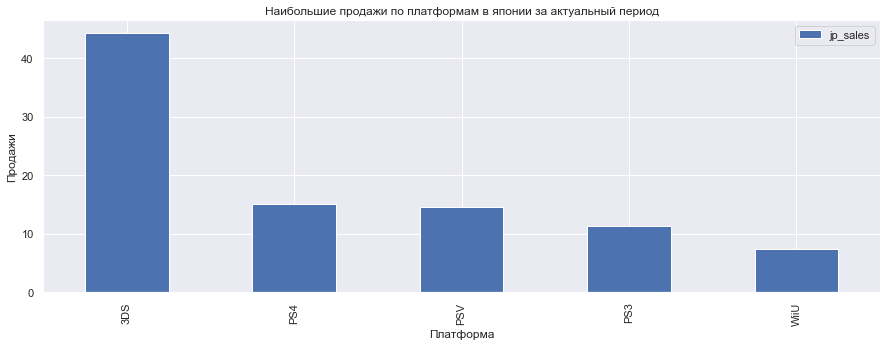

In [64]:
#ТОП 5 платформ за актуальный период
plot_histogram(data_temp, 'platform', 'jp_sales', 'Наибольшие продажи по платформам в японии за актуальный период',
               'Платформа', 'Продажи')

In [65]:
#доля 3DS к общему числу продаж в евросоюзе
na = data_temp.query('platform == "3DS"')
na['jp_sales'].sum() / data_temp['jp_sales'].sum()

0.4752390160060156

In [66]:
#доля PS4 к общему числу продаж в евросоюзе
na = data_temp.query('platform == "PS4"')
na['jp_sales'].sum() / data_temp['jp_sales'].sum()

0.16134923192609305


В Японии наиболее популярной консолью являлась 3DS от Nintendo c 47.5% от общего рынка, далее, с большим отрывом - PS4 c 16%.

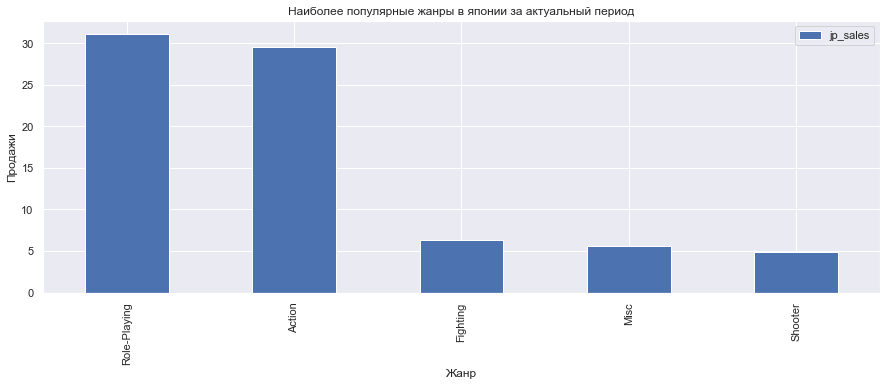

In [67]:
#ТОП 5 жанров за актуальный период
plot_histogram(data_temp, 'genre', 'jp_sales', 'Наиболее популярные жанры в японии за актуальный период',
               'Жанр', 'Продажи')

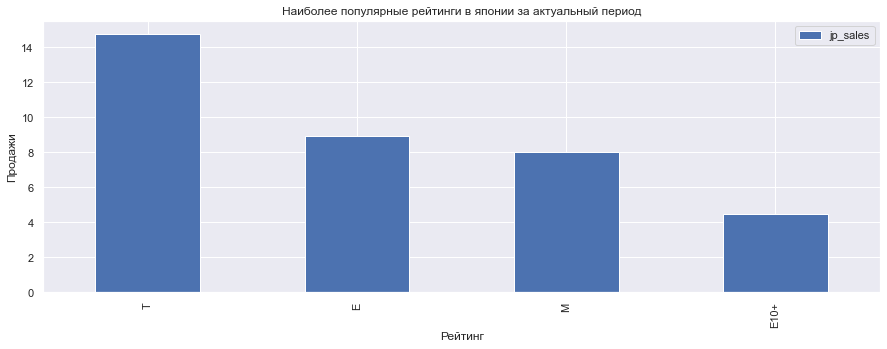

In [68]:
#рейтинг
plot_histogram(data_temp, 'rating', 'jp_sales', 'Наиболее популярные рейтинги в японии за актуальный период',
               'Рейтинг', 'Продажи')

 - ВЫВОД по актуальному периоду в Японии в актуальный период (2014-16)
     
     
     - ТОП игровых консолей: Nintendo 3DS и с большим отрывом - PS 4;
     - ТОП жанров игр: Role-Playing, Action;
     - ТОП рейтингов: «T» («Teen») — «Подросткам», , «E» («Everyone») — «Для всех», «M» («Mature») — «Для взрослых».

#### Промежуточный вывод по портрету пользователей

Актуальность данных - ключ к объективному прогнозу. Для определения портретов пользователя были использованы данные 2014-2016 годов, которые наилучшим образом отражают картину на рынке консолей и игр.

В 2017 году наибольшую прибыль будут приносить игры жанров Action, Shooter, для платформы PS4 с рейтингом - «M» («Mature») — «Для взрослых».

В Японии наблюдается популярность консоли Nintendo DS3 с долей 47.5% от общего рынка. В регионах "Евросоюз" и "Северная Америка" - существенное преобладание PS4.

### Проверка гипотез

- TO DO: 


    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные;

- Сформулируем нулевые гипотезы:

    - Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [69]:
#применяется фильтр для нахождения среднего значения для Xbox One
box_one = data[(data['platform']=='XOne') & (data['year_of_release']>2013)]['user_score']
box_one.mean()

6.594545454545453

In [70]:
#применяется фильтр для нахождения среднего значения для PC
pc = data[(data['platform']=='PC') & (data['year_of_release']>2013)]['user_score']
pc.mean()

6.298360655737703

In [71]:
#Выполним проверку гипотезы

alpha = .01

results = st.ttest_ind(box_one.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


С вероятностью 11% можно получить различные пользовательские рейтинги

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Сформулируем нулевые гипотезы:

    - Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
    - Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [72]:
#фильтр
action = data[(data['genre']=='Action') & (data['year_of_release']>2006)]['user_score']

In [73]:
#среднее
action.mean()

6.836079077429997

In [74]:
#фильтр
sports = data[(data['genre']=='Sports') & (data['year_of_release']>2006)]['user_score']

In [75]:
#среднее
sports.mean()

6.307979626485568

In [76]:
#Выполним проверку гипотезы.

alpha = .01

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


Практически нет вероятности получить одинаковые рейтинги

### Общий вывод

Задачей исследования являлось определение закономерностей, определяющих успешность игры. Исследование позволило сформировать прогноз на 2017 год: больше всего продаж обеспечат игры для консоли Play Station 4, которая занимает лидирующие позиции на рынке,  в жанрах Shooter, с рейтингом - «M» («Mature») — «Для взрослых».

Исследование включало в себя следующие этапы:
- Изучение общей информации;

В котором выполнена первоначальная оценка данных, получено первичное представление о типах данных и количестве пропусков.

- Предобработка данных;

На этой стадии были удалены пропуски в столбцах "name" и "release date". Количество удаленных строк - менее 5% от общего количества.  В перечне уникальных значений, в столбце оценок пользователей, присутствовало значение 'tbd' (to be determined), т.е. рейтинг ожидается, значения таких ячеек были изменены на NaN, для того чтобы в дальнейшем использовать данный столбец для исследовательского анализа. 

- Исследовательский анализ данных;

Исходя из сформированных данных, можно утверждать, что в 90е годы объемы продаж игр показывали большие темпы роста, вплоть до 2008 года, однако после, началось существенное падение показателей. Наиболее веросятным событием, после которого был отмечен значительный спад, явилось начало эпохи мобильной разаработки. Появился App Store, количество скачиваний из которого, равно как и количество приложений в нем, в в частности игр - росло экспоненциально. 

Однако в 2013 году падение перешло в небольшой рост, 2 гиганта индустрии - Sony и Microsoft выпустили 2е новых консоли - PS4 и Xbox One, что сопровождалось масштабной рекламной компанией. 

Поскольку задачей исследования является формирование прогноза на 2017 год, была выделена выборка данных за 2014 - 2016 годы. 2013 год был исключен, поскольку PS4 и Xbox One были выпущены в ноябре 2013. 

Для этого периода, были выделены 3 лидера продаж:
   
       - PS4;
       - XOne;
       - 3DS от Nintendo;
       
До 2015 года PS4 и Xbox One демонстрировали рост объемов продаж, остальные консоли, включая Nintendo - 3DS - устойчивое снижение показателей. В общей же выборке - Nintendo - 3DS ненадолго захватила инициативу, но после 2008 года, объемы продаж игр для этой консоли пошли на спад.

Проведено исследование зависимости продаж от оценок пользователей и критиков. Выяснено, что покупатели охотнее прислушиваются к критикам, чем к пользователя. Зависимость от покупателй показала крайне слабую корреляцию.

По выборке для актуального периода, наибольшую прибыльность показали следующие жанры:
   
       - Shooter;
       - Sports;
       - Platform;
       
Отрыв жанра Shooter от остальных - крайне велик. По результатам исследования всего набора данных, Shooter занимал второе место, сместив в актуальном периоде жанр Platform на третью позицию. 

- Портрет пользователя в регионах продаж:

По актуальному периоду в Северной Америке в актуальный период (2014-16)
         
         - ТОП игровых консолей: PS4, XBox One;
         - ТОП жанров игр: Shooter, Action, Sports;
         - ТОП рейтингов: «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам».
         
По актуальному периоду в Японии в актуальный период (2014-16)
         
         - ТОП игровых консолей: Nintendo 3DS и с большим отрывом - PS 4;
         - ТОП жанров игр: Role-Playing, Action;
         - ТОП рейтингов: «T» («Teen») — «Подросткам», , «E» («Everyone») — «Для всех», «M» («Mature») — «Для взрослых».
         
         
 NA и EU во многом схожи, в то время, как Япония более самобытна. В Японии наблюдается популярность консоли Nintendo DS3 с долей 47.5% от общего рынка. В регионах "Евросоюз" и "Северная Америка" - существенное преобладание PS4.
 
 - Проверка гипотез;
 
 Были сформулированы следующие гипотезы:
 
         - Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
         - Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.
         
 С вероятностью 11% можно получить различные пользовательские рейтинги
 
 А также:
 
         - Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
         - Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются
         
В результате проверки, нулевая гипотеза была опровергнута. Практически нет вероятности получить одинаковые рейтинги.